<a href="https://colab.research.google.com/github/KevinDussan24/MetNumUN-2025-I/blob/main/kdussanr_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 33 µs, sys: 4 µs, total: 37 µs
Wall time: 41.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.148
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.29
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmulExam(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if (len(A[0]) != len(B)):
      print("Matrices no compatibles")
      return
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a, b)

Matrices no compatibles


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if (len(A[0]) != len(B)):
      return print("Matrices are not compatible")
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

matmul(a, b)

Matrices are not compatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 1, 1],
     [2, 3, 4],
     [7, 8, 9]]

b = [[1, 2, 3, 4],
     [1, 8, 6, 11],
     [10, 15, 14, 13]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a,b)

CPU times: user 30 µs, sys: 3 µs, total: 33 µs
Wall time: 37.9 µs


[[12, 25, 23, 28], [45, 88, 80, 93], [105, 213, 195, 233]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.39151671408458544

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7072976190083847, 0.5399267139664042, 0.2654022560460946],
 [0.8273965303399257, 0.5127270165099276, 0.5568981321818891]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
import random


randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

def mulPromT(func, arg1, arg2, n=10):
    total_time = 0
    for i in range(n):
        start_time = time.process_time()
        func(arg1, arg2)
        end_time = time.process_time()
        total_time += end_time - start_time
    return total_time / n
promTPy = mulPromT(matmul,randa, randb)

print("Average time:", promTPy)

Average time: 6.012040558


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

dic = {'Framework':['Python'],
        'Average time':[promTPy]
        }

df = pd.DataFrame(dic)
display(df)

,Framework,Average time
0,Python,6.012041


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import pandas as pd
import numpy as np
def matmulNumpy(mata, matb):
    return np.dot(mata, matb)


#note que el método mulPromT() es el responsable de correr 10 veces la multiplicaci[on
promNumpy = mulPromT(matmulNumpy, randa, randb)
newPalNumpy = {'Framework': 'Numpy', 'Average time': promNumpy}
df = pd.concat([df, pd.DataFrame([newPalNumpy])], ignore_index=True)
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.4 s, sys: 21.8 ms, total: 6.42 s
Wall time: 6.39 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/ec1ddf3d


In [ ]:
!pip install setuptools==58.2.0
!pip install numpy==1.21.6

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.68 ms, sys: 0 ns, total: 9.68 ms
Wall time: 10.1 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 184 µs, sys: 2 µs, total: 186 µs
Wall time: 195 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a = [[1, 3],
     [5, 8]]

b = [[3, 3],
     [7, 4]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, C)
    double precision, dimension (:,:), intent(in) :: A
    double precision, dimension (:,:), intent(in) :: B
    double precision, dimension (2,2), intent(out) :: C

    C = matmul(A,B)

end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
fortran_matmul(a,b)

CPU times: user 38 µs, sys: 1 µs, total: 39 µs
Wall time: 42.7 µs


array([[24., 15.],
       [71., 47.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, C)
    double precision, dimension (:,:), intent(in) :: A
    double precision, dimension (:,:), intent(in) :: B
    double precision, dimension (600,600), intent(out) :: C

    C = matmul(A,B)

end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
fortran_matmul(randa, randb)

CPU times: user 24.9 ms, sys: 2.01 ms, total: 26.9 ms
Wall time: 98.5 ms


array([[25.61912976, 25.76013505, 22.20000556, ..., 26.9654854 ,
        27.00489403, 22.60032929],
       [28.63344076, 28.92910789, 26.44640919, ..., 32.56115676,
        29.34407218, 24.92510524],
       [26.72539021, 26.48078591, 24.16894611, ..., 28.73558388,
        26.16497988, 23.06886928],
       ...,
       [24.91586134, 27.75441935, 24.60868347, ..., 29.93412062,
        27.68925065, 23.94683907],
       [24.22567075, 24.54271264, 23.57176823, ..., 27.30755247,
        26.06709755, 22.760481  ],
       [25.84054493, 25.96113287, 23.39710173, ..., 30.19039071,
        29.00442995, 23.07185704]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
average = 0
for i in range(10):
  start = time.process_time()
  fortran_matmul(randa, randb)
  end = time.process_time()
  average += end - start

average = average/10
df.loc[len(df.index)] = ["Fortranmagic", average]
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile test.f
        program TEST

            ! Variables más descriptivas
            integer :: num_filas_X = 600
            integer :: num_columnas_X = 100
            integer :: num_filas_Y = 600
            integer :: num_columnas_Y = 100
            integer :: num_filas_Z = 600
            integer :: num_columnas_Z = 600

            real :: H, sta, fin

            integer :: contador1, contador2, contador3, contador4

            double precision, dimension(600,100) :: X
            double precision, dimension(100,600) :: Y
            double precision, dimension(600,600) :: Z

            do contador1 = 1, num_filas_X
                do contador2 = 1, num_columnas_X
                  X(contador1, contador2) = contador1 + contador2 * 0.1
                end do
            end do

            do contador1 = 1, num_filas_Y
                do contador2 = 1, num_columnas_Y
                    Y(contador1, contador2) = contador1 + contador2 * 0.5
                end do
            end do

            H = 0.0

            do contador3 = 1, 10
                call cpu_time(sta)
                Z = matmul(X,Y)
                call cpu_time(fin)
                H = H + (fin-sta)
            end do
            H = H/10.0
            PRINT *, H
            stop
        end program TEST

Overwriting test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran test.f -o test
avg_fortran = !./test

In [ ]:
import subprocess

try:
    output = subprocess.check_output(['./test']).decode('utf-8').strip()
    avg_fortran = float(output.split()[0])
    print("El promedio en Fortran es:", avg_fortran)
except subprocess.CalledProcessError as e:
    print("Error al ejecutar el programa:", e)
except ValueError:
    print("Error: La salida no es un número válido.")

El promedio en Fortran es: 0.00834819954


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ["Fortran", avg_fortran]
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143
3,Fortran,0.008348


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_in_c.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    //------------------------------
    int count = 10;
    FILE *archivo;

    int A[600][100];
    // Rellenar la matriz
    for(int i = 0; i < 600; i++) {
        for(int j = 0; j < 100; j++) {
            A[i][j] = count + i + j;
        }
    }

    //------------------------------

    int B[100][600];
    // Rellenar la matriz
    for(int i = 0; i < 100; i++) {
        for(int j = 0; j < 600; j++) {
            B[i][j] = count + i + j;
        }
    }

    //------------------------------

    int Resultado[600][600];

    // Realizar la multiplicación 10 veces
    clock_t inicio, stop;
    double total = 0.0;

    for(int repeticion = 0; repeticion < 10; repeticion++) {
        inicio = clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            for(int j = 0; j < 600; j++) {
                Resultado[i][j] = 0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        stop = clock();
        total += (double)(stop - inicio) / CLOCKS_PER_SEC;
    }
    total = total / 10;
    printf("%f ", total);

    // Escribir el tiempo en un archivo para ingresarlo al DataFrame
    archivo = fopen("c_total.txt", "w+");
    fprintf(archivo, "%f", total);
    fclose(archivo);

    return 0;
}

Overwriting mult_in_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc mult_in_c.c -o mult_in_c
avg_c = !./mult_in_c
#print(avg_c)

In [ ]:
import subprocess

try:
    output = subprocess.check_output(['./mult_in_c']).decode('utf-8').strip()
    avg_c = float(output.split()[0])
    print("El promedio que hay en C es:", avg_c)
except subprocess.CalledProcessError as e:
    print("Error al ejecutar el programaa:", e)
except ValueError:
    print("Error: La salida NO es un número válido.")

El promedio que hay en C es: 0.277871


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ["C", avg_c]
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143
3,Fortran,0.008348
4,C,0.277871


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_cpp.cpp

#include <iostream>
#include <fstream>
#include <ctime>

int main() {
    //------------------------------
    int count = 10;
    std::ofstream archivo;

    int A[600][100];
    // Rellenar la matriz
    for(int i = 0; i < 600; i++) {
        for(int j = 0; j < 100; j++) {
            A[i][j] = count + i + j;
        }
    }

    //------------------------------

    int B[100][600];
    // Rellenar la matriz
    for(int i = 0; i < 100; i++) {
        for(int j = 0; j < 600; j++) {
            B[i][j] = count + i + j;
        }
    }

    //------------------------------

    int Resultado[600][600];

    // Realizar la multiplicación 10 veces
    clock_t inicio, stop;
    double total = 0.0;

    for(int repeticion = 0; repeticion < 10; repeticion++) {
        inicio = clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            for(int j = 0; j < 600; j++) {
                Resultado[i][j] = 0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        stop = clock();
        total += (double)(stop - inicio) / CLOCKS_PER_SEC;
    }
    total = total / 10;
    std::cout << total << " ";

    // Escribir el tiempo en un archivo para ingresarlo al DataFrame
    archivo.open("cpp_total.txt");
    archivo << total;
    archivo.close();

    return 0;
}

Overwriting mult_cpp.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ mult_cpp.cpp -o mult_cpp
avg_cpp = !./mult_cpp
#print(avg_cpp)

In [ ]:
import subprocess

try:
    output = subprocess.check_output(['./mult_cpp']).decode('utf-8').strip()
    avg_cpp = float(output.split()[0])
    print("El promedio que hay en C++ es:", avg_cpp)
except subprocess.CalledProcessError as e:
    print("Error al ejecutar el programa:", e)
except ValueError:
    print("Error: La salida NO es un número válido.")

El promedio que hay en C++ es: 0.162662


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ["C++", avg_cpp]
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143
3,Fortran,0.008348
4,C,0.277871
5,C++,0.162662


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulJava.java
import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

class MatMulJava {

    public static void main(String[] args) {

        /** m es el numero de filas de matA */
        int m = 600;

        /** n es el numero de columnas de matA y el numero de filas de matB */
        int n = 100;

        /** p es el numero de columnas de matB */
        int p = 600;
        int veces = 10;

        /** inicializar las matrices*/
        int[][] matA = new int[m][n];
        int[][] matB = new int[n][p];
        int[][] matC = new int[m][p];
        randMatJ(matA);
        randMatJ(matB);

        double promTJ = promTJava(matA, matB, matC, m, n, p, veces);
        System.out.println("El tiempo fue: "+promTJ);

        try {
            FileWriter fileWriter = new FileWriter("javaT.txt");
            fileWriter.write(Double.toString(promTJ));
            fileWriter.close();
        } catch (IOException e) {
            e.printStackTrace();
        }
    }

    static double promTJava(int[][] matA, int[][] matB, int[][] matC, int m, int n, int p, int veces) {
        long totalT = 0;

        for (int i = 0; i < veces; i++) {

            long inicio = System.currentTimeMillis();

            for (int j = 0; j < m; j++) {
            for (int k = 0; k < p; k++) {
                int sum = 0;
                for (int l = 0; l < n; l++) {
                    sum += matA[j][l] * matB[l][k];
                }
                matC[j][k] = sum;
            }
            }

            long fin = System.currentTimeMillis();

            long tiempoMul = fin - inicio;
            totalT += tiempoMul;
        }

        /** casteo de long a double y de milesimas de segundo a segundos */
        double promT = (double) totalT / (veces * 1000);
        return promT;
    }


    static void randMatJ(int[][] matN) {
        Random rdm = new Random();

        for (int i = 0; i < matN.length; i++) {
            for (int j = 0; j < matN[i].length; j++) {
                matN[i][j] = rdm.nextInt(10000);
            }
        }
    }
}

Overwriting MatMulJava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatMulJava.java
!java MatMulJava

El tiempo fue: 0.0769


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
javaF = open('javaT.txt','r')
promJ = float(javaF.readline())
newPalJ= {'Framework':'Java', 'Average time':promJ}
df = pd.concat([df, pd.DataFrame([newPalJ])], ignore_index=True)
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143
3,Fortran,0.008348
4,C,0.277871
5,C++,0.162662
6,Java,0.076900


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulJavascript.js
const { performance } = require('perf_hooks');
const fs = require("fs");

//------------------------------
const N = 600;

let count = 10;

let A_matrix = [];
// Rellenar la matriz A
for (let i = 0; i < N; i++) {
    A_matrix[i] = [];
    for (let j = 0; j < N; j++) {
        A_matrix[i][j] = count + i + j;
    }
}

//------------------------------
let B_matrix = [];
// Rellenar la matriz B
for (let i = 0; i < N; i++) {
    B_matrix[i] = [];
    for (let j = 0; j < N; j++) {
        B_matrix[i][j] = count + i + j;
    }
}

//------------------------------
let Result_matrix = [];

// Realizar la multiplicación 10 veces
let total_time = 0.0;
let start_time = 0;
let end_time = 0;

for (let iteration = 0; iteration < 10; iteration++) {
    start_time = performance.now();

    // Realizar la multiplicación de matrices
    for (let i = 0; i < N; i++) {
        Result_matrix[i] = [];
        for (let j = 0; j < N; j++) {
            Result_matrix[i][j] = 0;
            for (let k = 0; k < N; k++) {
                Result_matrix[i][j] += A_matrix[i][k] * B_matrix[k][j];
            }
        }
    }
    end_time = performance.now();
    total_time += end_time - start_time;
}
total_time = (total_time / 1000);
console.log(total_time);

Overwriting MatMulJavascript.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess

try:
    output = subprocess.check_output(['node', 'MatMulJavascript.js']).decode('utf-8').strip()
    avg_JavaScript = float(output)
    print("La salida del script es:", avg_JavaScript)
except subprocess.CalledProcessError as e:
    print("Error al ejecutar el script:", e)
except ValueError:
    print("Error: La salida no es un número válido.")

La salida del script es: 32.007859679999996


In [ ]:
!node MatMulJavascript.js
print(avg_JavaScript)

34.75608591300016
32.007859679999996


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ["Javascript", avg_JavaScript]
display(df)

,Framework,Average time
0,Python,6.012041
1,Numpy,0.034634
2,Fortranmagic,0.019143
3,Fortran,0.008348
4,C,0.277871
5,C++,0.162662
6,Java,0.076900
7,Javascript,32.007860


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_time = df.loc[df['Average time'].idxmin()]
display(min_time)

,3
Framework,Fortran
Average time,0.008348


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
df['Speed Factor'] = df['Average time'] / df['Average time'].min()
display(df)

,Framework,Average time,Speed Factor
0,Python,6.012041,720.160141
1,Numpy,0.034634,4.148676
2,Fortranmagic,0.019143,2.293104
3,Fortran,0.008348,1.000000
4,C,0.277871,33.285141
5,C++,0.162662,19.484680
6,Java,0.076900,9.211567
7,Javascript,32.007860,3834.103333


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by=['Average time'], inplace=True)
display(df)

,Framework,Average time,Speed Factor
3,Fortran,0.008348,1.000000
2,Fortranmagic,0.019143,2.293104
1,Numpy,0.034634,4.148676
6,Java,0.076900,9.211567
5,C++,0.162662,19.484680
4,C,0.277871,33.285141
0,Python,6.012041,720.160141
7,Javascript,32.007860,3834.103333


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  0           0 RESUME                   0

  1           2 LOAD_NAME                0 (a)
              4 LOAD_NAME                1 (b)
              6 LOAD_NAME                2 (c)
              8 BINARY_OP                5 (*)
             12 BINARY_OP                0 (+)
             16 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 527 µs, sys: 6 µs, total: 533 µs
Wall time: 543 µs


np.float64(333328333350000.0)

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 150 µs, sys: 1 µs, total: 151 µs
Wall time: 156 µs


np.float64(333328333350000.0)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 179 µs, sys: 2 µs, total: 181 µs
Wall time: 185 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

np.float64(0.0)

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 6, 2, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

np.float64(0.974681140496891)

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

np.float64(14.5)

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

np.float64(14.5)

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

np.int64(1)

In [ ]:
# ... or by label.
s.loc['a']

np.int64(1)

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL (3).csv


In [ ]:
import pandas as pd
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Close']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Close'}, axis=1)
              .sort_values('Close', ascending=True))
  xs = counted['Close']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Close', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Close')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Volume']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Volume'}, axis=1)
              .sort_values('Volume', ascending=True))
  xs = counted['Volume']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Volume')
_ = plt.ylabel('count()')

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

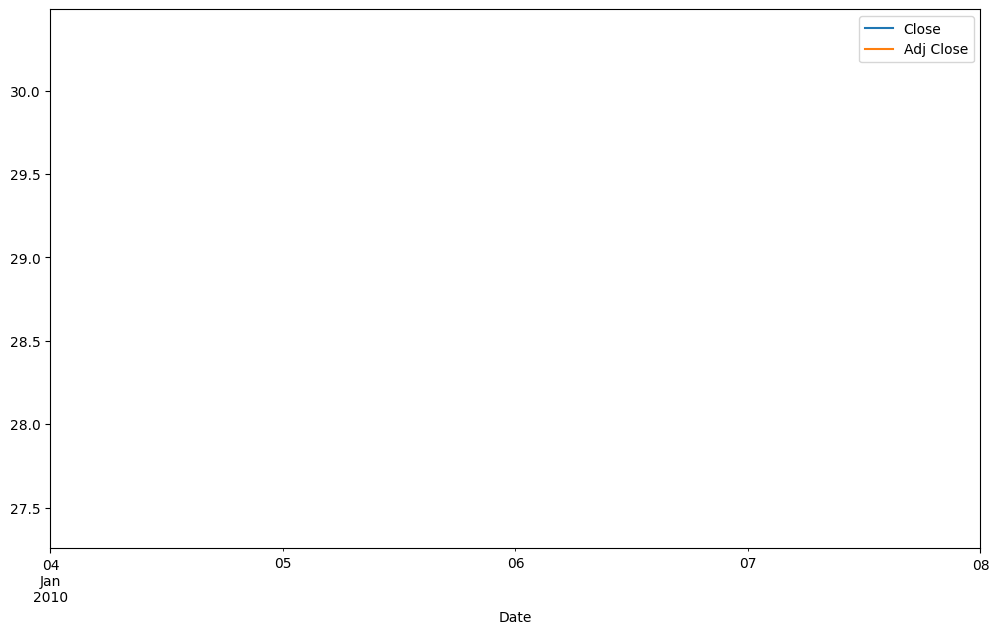

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!